<a href="https://colab.research.google.com/github/masheia/Pharmacy-Sales-Analysis/blob/main/pharmacy_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loading

In [4]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()


Saving pharmacy_sales_analytics.csv to pharmacy_sales_analytics (1).csv


In [7]:
df = pd.read_csv(list(uploaded.keys())[0])

In [8]:
# Preview structure
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum())

# Quick peek at data
df.head()

Dataset shape: (10000, 12)

Columns:
 ['Date', 'Pharmacy', 'Location', 'Drug', 'Brand', 'Price', 'Quantity', 'Supplier_Name', 'Batch_Number', 'Expiry_Date', 'Sales_Channel', 'Drug_Form']

Missing values per column:
 Date              2
Pharmacy         18
Location          1
Drug             16
Brand             8
Price            36
Quantity          7
Supplier_Name    30
Batch_Number      0
Expiry_Date       0
Sales_Channel     0
Drug_Form         0
dtype: int64


,Date,Pharmacy,Location,Drug,Brand,Price,Quantity,Supplier_Name,Batch_Number,Expiry_Date,Sales_Channel,Drug_Form
0,02/12/2024,Ryan PLC,Urban,Amoxicillin,HealthFirst,1271.41,95.0,"Robinson, Jones and Welch",fA-39909-QL,09/07/2026,Market Stall,Tablet
1,14/11/2024,"Baker, Mason and White",Rural,Amoxicillin,Hea1thFirst,1316.77,78.0,"Brooks, Lam and Hayes",qz-54353-iQ,09/09/2026,Market Stall,Syrup
2,NaN,Spence PLC,Rural,Ibuprofen,BioCare,4085.27,1.0,Novak PLC,NK-75107-ge,17/06/2026,In-Store,Capsule
3,16/07/2024,"Watts, Robinson and Nguyen",Rural,Paracetamol,BioCare,690.61,49.0,"Robinson, Jones and Welch",px-84251-sk,01/04/2026,Mobile Van,Injection
4,14/03/2025,Harrell LLC,Rural,Amoxicillin,MediPlus,4870.96,49.0,Chapman and Sons,QJ-84980-tQ,15/07/2025,Market Stall,Injection


 Exploratory Data Analysis

In [9]:
# === Stage 2: Exploratory Data Analysis (EDA) ===

# Basic summary
print(df.describe(include='all'))

# Unique values in key categorical columns
for col in ['Location', 'Drug', 'Brand', 'Sales_Channel', 'Drug_Form']:
    print(f"\n{col} unique values: {df[col].nunique()}")

# Most frequent pharmacies, suppliers, and drugs
print(df['Pharmacy'].value_counts().head(10))
print(df['Drug'].value_counts().head(10))
print(df['Supplier_Name'].value_counts().head(10))


              Date        Pharmacy Location         Drug     Brand  \
count         9998            9982     9999         9984      9992   
unique         366              50        2           10         8   
top     01/10/2024  Blake and Sons    Rural  Paracetamol  MediPlus   
freq            44             236     5047         1042      2163   
mean           NaN             NaN      NaN          NaN       NaN   
std            NaN             NaN      NaN          NaN       NaN   
min            NaN             NaN      NaN          NaN       NaN   
25%            NaN             NaN      NaN          NaN       NaN   
50%            NaN             NaN      NaN          NaN       NaN   
75%            NaN             NaN      NaN          NaN       NaN   
max            NaN             NaN      NaN          NaN       NaN   

              Price     Quantity Supplier_Name Batch_Number Expiry_Date  \
count   9964.000000  9993.000000          9970        10000       10000   
unique   

 Missing Value Treatment & Cleaning

In [11]:
# === Stage 3: Missing Value Treatment & Cleaning ===

# Standardize text fields
df['Location'] = df['Location'].str.title().str.strip()
df['Sales_Channel'] = df['Sales_Channel'].str.title().str.strip()
df['Drug_Form'] = df['Drug_Form'].str.title().str.strip()

# Create Price_per_Unit column before handling missing values
df['Price_per_Unit'] = df['Price'] / df['Quantity']

# Handle missing Price_per_Unit using the newly created column
df['Price_per_Unit'] = df.apply(
    lambda x: x['Price'] / x['Quantity'] if pd.isnull(x['Price_per_Unit']) else x['Price_per_Unit'],
    axis=1
)

# Create Days_to_Expiry column before handling missing values
df['Expiry_Date'] = pd.to_datetime(df['Expiry_Date'], errors='coerce')
df['Days_to_Expiry'] = (df['Expiry_Date'] - pd.Timestamp.today()).dt.days

# Handle missing Expiry_Date or Days_to_Expiry
df['Days_to_Expiry'] = df['Days_to_Expiry'].fillna((df['Expiry_Date'] - pd.Timestamp.today()).dt.days)


# Replace missing Brands with "Unknown"
df['Brand'] = df['Brand'].fillna("Unknown")

# Drop duplicates
df.drop_duplicates(inplace=True)

print("After cleaning:", df.shape)

After cleaning: (10000, 14)


 Outlier Detection

Outliers detected: 0


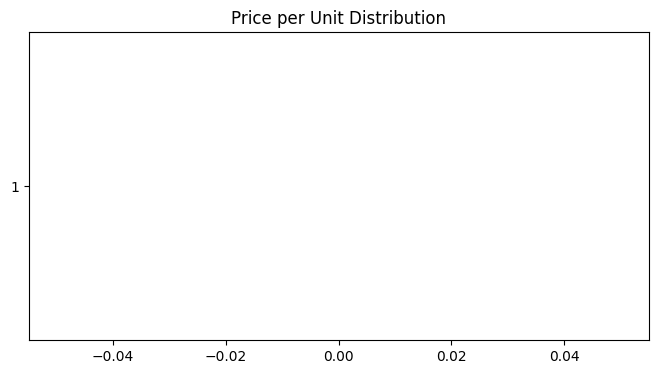

In [13]:
# === Stage 4: Outlier Detection ===
import numpy as np
import matplotlib.pyplot as plt

# Visualize price per unit distribution
plt.figure(figsize=(8,4))
plt.boxplot(df['Price_per_Unit'], vert=False)
plt.title("Price per Unit Distribution")


# Detect outliers using IQR
Q1 = df['Price_per_Unit'].quantile(0.25)
Q3 = df['Price_per_Unit'].quantile(0.75)
IQR = Q3 - Q1

# Define upper/lower bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Mark and filter
outliers = df[(df['Price_per_Unit'] < lower) | (df['Price_per_Unit'] > upper)]
print("Outliers detected:", outliers.shape[0])

# Option: Remove or cap outliers
df['Price_per_Unit'] = np.where(df['Price_per_Unit'] > upper, upper,
                        np.where(df['Price_per_Unit'] < lower, lower, df['Price_per_Unit']))
plt.show()

# Task
Analyze the sales performance of the provided data.

## Analyze sales by dimensions

### Subtask:
Explore sales performance across different dimensions like Location, Drug, Brand, Sales Channel, and Drug Form. This could involve grouping the data and calculating total sales, average sales, etc.


In [22]:
from google.colab import files

files.download('cleaned_pharmacy_data_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
# Check the DataFrame's structure and data types
print(df.info())

# Verify that missing values have been handled
print("\nMissing values after cleaning:\n", df.isnull().sum())

# Display the first few rows to show the new columns
print("\nDataFrame head after cleaning and analysis:")
display(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2024-02-12 to 2024-11-05
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Pharmacy             9982 non-null   object        
 1   Location             9999 non-null   object        
 2   Drug                 9984 non-null   object        
 3   Brand                10000 non-null  object        
 4   Price                9964 non-null   float64       
 5   Quantity             9993 non-null   float64       
 6   Supplier_Name        9970 non-null   object        
 7   Batch_Number         10000 non-null  object        
 8   Expiry_Date          3919 non-null   datetime64[ns]
 9   Sales_Channel        10000 non-null  object        
 10  Drug_Form            10000 non-null  object        
 11  Price_per_Unit       9957 non-null   float64       
 12  Days_to_Expiry       3919 non-null   float64       
 13  Total_Sales   

,Pharmacy,Location,Drug,Brand,Price,Quantity,Supplier_Name,Batch_Number,Expiry_Date,Sales_Channel,Drug_Form,Price_per_Unit,Days_to_Expiry,Total_Sales,Price_per_Unit_norm,Quantity_norm,Days_to_Expiry_norm
Date,,,,,,,,,,,,,,,,,
2024-02-12,Ryan PLC,Urban,Amoxicillin,HealthFirst,1271.41,95.0,"Robinson, Jones and Welch",fA-39909-QL,2026-09-07,Market Stall,Tablet,13.383263,335.0,120783.95,0.062249,0.95,0.573848
NaT,"Baker, Mason and White",Rural,Amoxicillin,Hea1thFirst,1316.77,78.0,"Brooks, Lam and Hayes",qz-54353-iQ,2026-09-09,Market Stall,Syrup,16.881667,337.0,102708.06,0.078521,0.78,0.575729
NaT,Spence PLC,Rural,Ibuprofen,BioCare,4085.27,1.0,Novak PLC,NK-75107-ge,NaT,In-Store,Capsule,214.994394,NaN,4085.27,1.000000,0.01,0.258702
NaT,"Watts, Robinson and Nguyen",Rural,Paracetamol,BioCare,690.61,49.0,"Robinson, Jones and Welch",px-84251-sk,2026-01-04,Mobile Van,Injection,14.094082,89.0,33839.89,0.065556,0.49,0.342427
NaT,Harrell LLC,Rural,Amoxicillin,MediPlus,4870.96,49.0,Chapman and Sons,QJ-84980-tQ,NaT,Market Stall,Injection,99.407347,NaN,238677.04,0.462372,0.49,0.258702


**Reasoning**:
Multiply the 'Price' and 'Quantity' columns and store the result in a new 'Total_Sales' column.



In [15]:
df['Total_Sales'] = df['Price'] * df['Quantity']

Data Normalization & Export

In [20]:
# === Stage 5: Data Normalization & Export ===
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Price_per_Unit_norm', 'Quantity_norm', 'Days_to_Expiry_norm']] = scaler.fit_transform(
    df[['Price_per_Unit', 'Quantity', 'Days_to_Expiry']].fillna(0)
)

# Final check
print(df.head())

# Save cleaned dataset
df.to_csv("cleaned_pharmacy_data_final.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_pharmacy_data_final.csv")


                              Pharmacy Location         Drug        Brand  \
Date                                                                        
2024-02-12                    Ryan PLC    Urban  Amoxicillin  HealthFirst   
NaT             Baker, Mason and White    Rural  Amoxicillin  Hea1thFirst   
NaT                         Spence PLC    Rural    Ibuprofen      BioCare   
NaT         Watts, Robinson and Nguyen    Rural  Paracetamol      BioCare   
NaT                        Harrell LLC    Rural  Amoxicillin     MediPlus   

              Price  Quantity              Supplier_Name Batch_Number  \
Date                                                                    
2024-02-12  1271.41      95.0  Robinson, Jones and Welch  fA-39909-QL   
NaT         1316.77      78.0      Brooks, Lam and Hayes  qz-54353-iQ   
NaT         4085.27       1.0                  Novak PLC  NK-75107-ge   
NaT          690.61      49.0  Robinson, Jones and Welch  px-84251-sk   
NaT         4870.96   

## Calculate sales

### Subtask:
Create a new column for total sales by multiplying 'Price' and 'Quantity'.


**Reasoning**:
Group the data by different categorical columns and calculate the sum of 'Total_Sales' for each group to explore sales performance across different dimensions.



In [16]:
# Group by Location and calculate total sales
sales_by_location = df.groupby('Location')['Total_Sales'].sum()
print("Total Sales by Location:\n", sales_by_location)

# Group by Drug and calculate total sales
sales_by_drug = df.groupby('Drug')['Total_Sales'].sum()
print("\nTotal Sales by Drug:\n", sales_by_drug)

# Group by Brand and calculate total sales
sales_by_brand = df.groupby('Brand')['Total_Sales'].sum()
print("\nTotal Sales by Brand:\n", sales_by_brand)

# Group by Sales Channel and calculate total sales
sales_by_channel = df.groupby('Sales_Channel')['Total_Sales'].sum()
print("\nTotal Sales by Sales Channel:\n", sales_by_channel)

# Group by Drug Form and calculate total sales
sales_by_form = df.groupby('Drug_Form')['Total_Sales'].sum()
print("\nTotal Sales by Drug Form:\n", sales_by_form)

Total Sales by Location:
 Location
Rural    6.678151e+08
Urban    6.588366e+08
Name: Total_Sales, dtype: float64

Total Sales by Drug:
 Drug
Amlodipine       1.295728e+08
Amoxicillin      1.292190e+08
Artemisinin      1.399734e+08
Azithromycin     1.336039e+08
Chloroquine      1.336338e+08
Ciprofloxacin    1.340343e+08
Coartem          1.276669e+08
Ibuprofen        1.252152e+08
Metformin        1.359216e+08
Paracetamol      1.363007e+08
Name: Total_Sales, dtype: float64

Total Sales by Brand:
 Brand
BioCare        2.833667e+08
Biokare        4.891364e+07
FarmaTrust     4.674763e+07
Hea1thFirst    5.133849e+07
HealthFirst    2.747759e+08
MediPlus       2.836135e+08
MediPluz       5.100449e+07
PharmaTrust    2.859884e+08
Unknown        9.219501e+05
Name: Total_Sales, dtype: float64

Total Sales by Sales Channel:
 Sales_Channel
In-Store        4.397463e+08
Market Stall    4.507501e+08
Mobile Van      4.361742e+08
Name: Total_Sales, dtype: float64

Total Sales by Drug Form:
 Drug_Form
Caps

## Analyze sales over time

### Subtask:
If the 'Date' column is suitable, analyze sales trends over time (e.g., daily, monthly, or yearly).


**Reasoning**:
Convert the 'Date' column to datetime, set it as the index, and then resample the data to analyze daily sales trends.



In [17]:
# Ensure 'Date' is datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

# Resample for daily sales
daily_sales = df['Total_Sales'].resample('D').sum()

# Display the first few rows of the daily sales data
print("Daily Sales Trends:")
print(daily_sales.head())

Daily Sales Trends:
Date
2024-01-05    3747442.37
2024-01-06    4810598.24
2024-01-07    3582348.86
2024-01-08    3355380.23
2024-01-09    4159586.99
Name: Total_Sales, dtype: float64


## Identify top performers

### Subtask:
Identify the top-performing pharmacies, drugs, or suppliers based on sales.


**Reasoning**:
Calculate and display the top 10 pharmacies and suppliers by total sales as per the instructions.



In [18]:
# Calculate total sales per pharmacy and identify top 10
pharmacy_sales = df.groupby('Pharmacy')['Total_Sales'].sum()
top_10_pharmacies = pharmacy_sales.sort_values(ascending=False).head(10)
print("Top 10 Pharmacies by Total Sales:\n", top_10_pharmacies)

# Calculate total sales per supplier and identify top 10
supplier_sales = df.groupby('Supplier_Name')['Total_Sales'].sum()
top_10_suppliers = supplier_sales.sort_values(ascending=False).head(10)
print("\nTop 10 Suppliers by Total Sales:\n", top_10_suppliers)

Top 10 Pharmacies by Total Sales:
 Pharmacy
Blake and Sons                    33467184.57
Blair PLC                         30519390.06
Abbott-Munoz                      30032772.29
Gray-Mayo                         29605736.05
Arroyo, Miller and Tucker         29560178.64
Galloway-Wyatt                    29271061.65
Ferrell, Rice and Maddox          29191792.27
Gardner, Robinson and Lawrence    29169574.01
Harris, Collins and Carney        29024815.28
Hoffman, Baker and Richards       28835528.96
Name: Total_Sales, dtype: float64

Top 10 Suppliers by Total Sales:
 Supplier_Name
Jones Inc                        86087006.02
Morton-Chase                     50269267.36
Yu Inc                           49332065.60
Johnston, Sanchez and Kennedy    48678261.31
Henderson-Bernard                46963791.47
Hensley, Powell and David        46345617.62
Daniels, Adkins and Brown        46193343.24
Brown, Valdez and Lucas          46171187.35
House-Glover                     45665956.00
Jones-Yo

## Visualize sales data

### Subtask:
Create visualizations to represent the sales analysis findings (e.g., bar charts for sales by category, line plots for sales trends).


**Reasoning**:
Create visualizations for sales analysis findings as requested by the instructions.



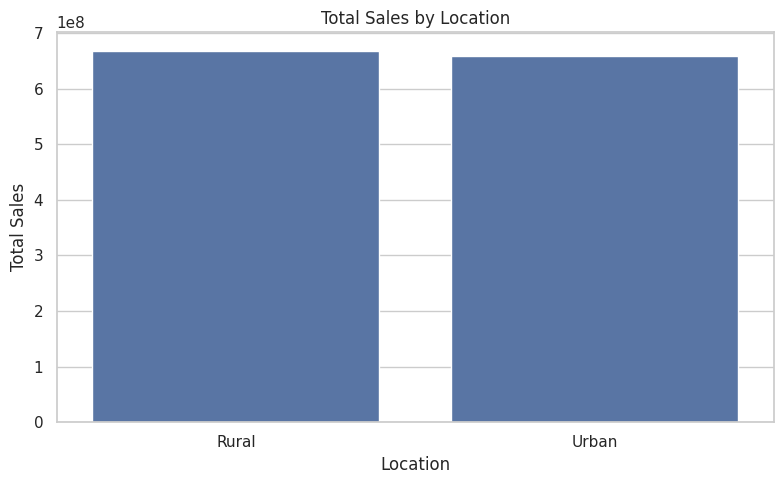

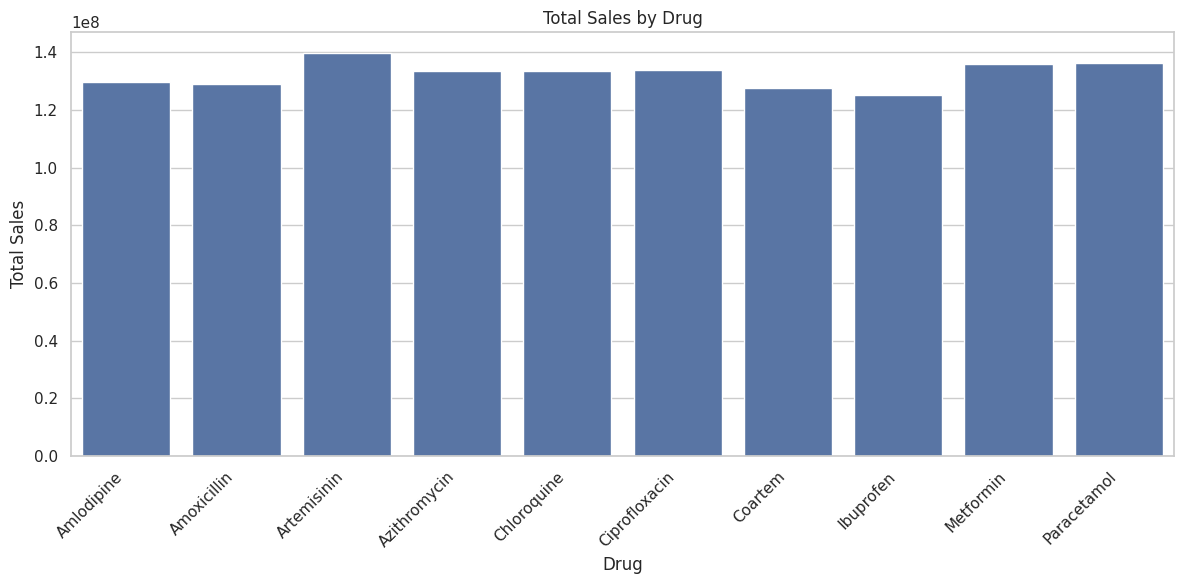

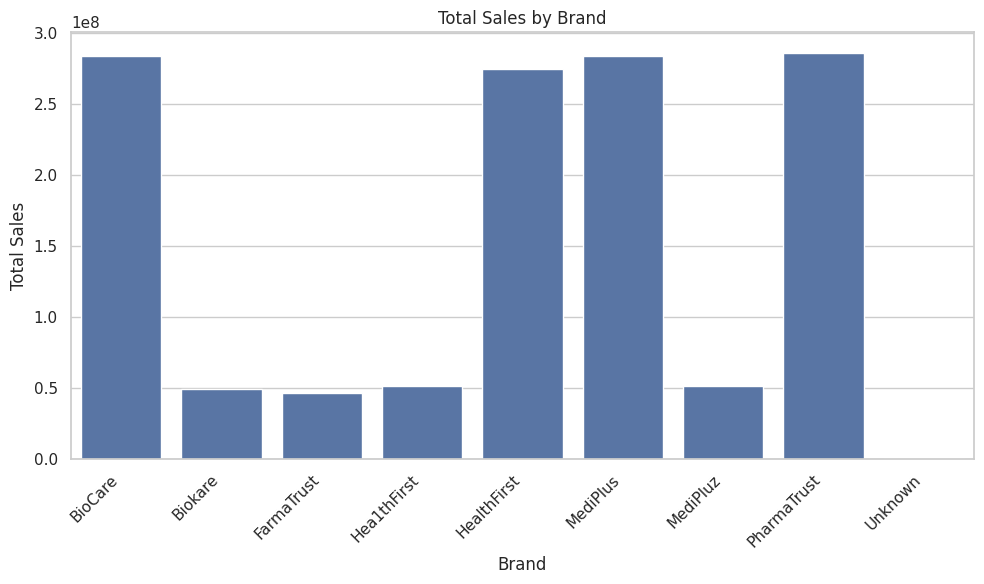

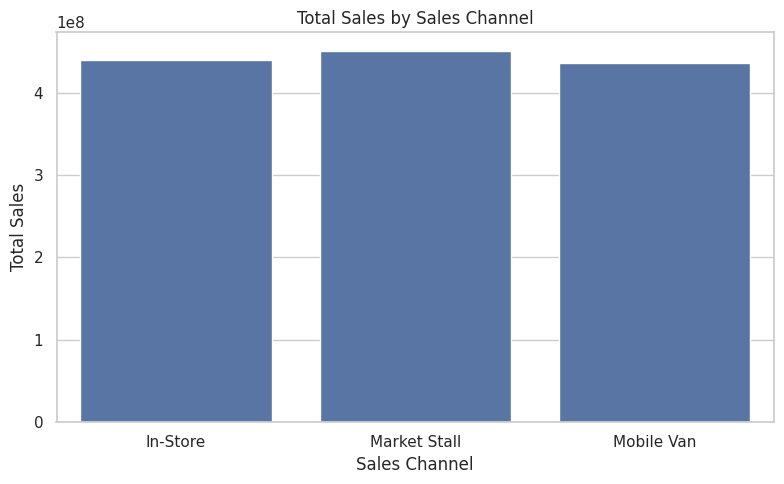

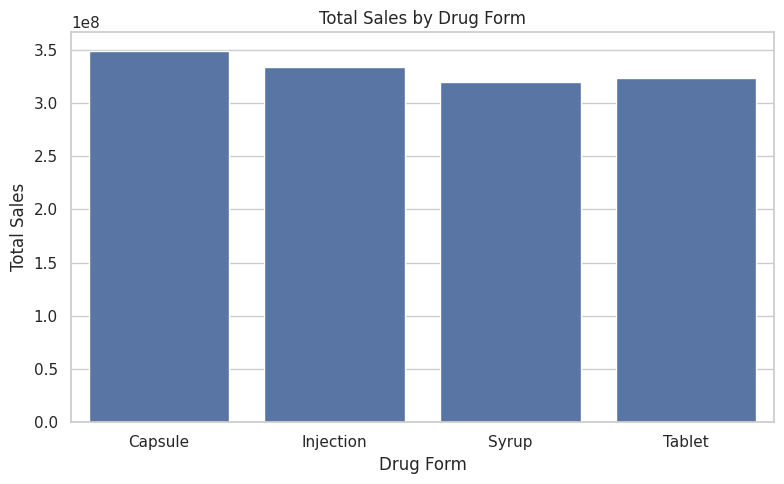

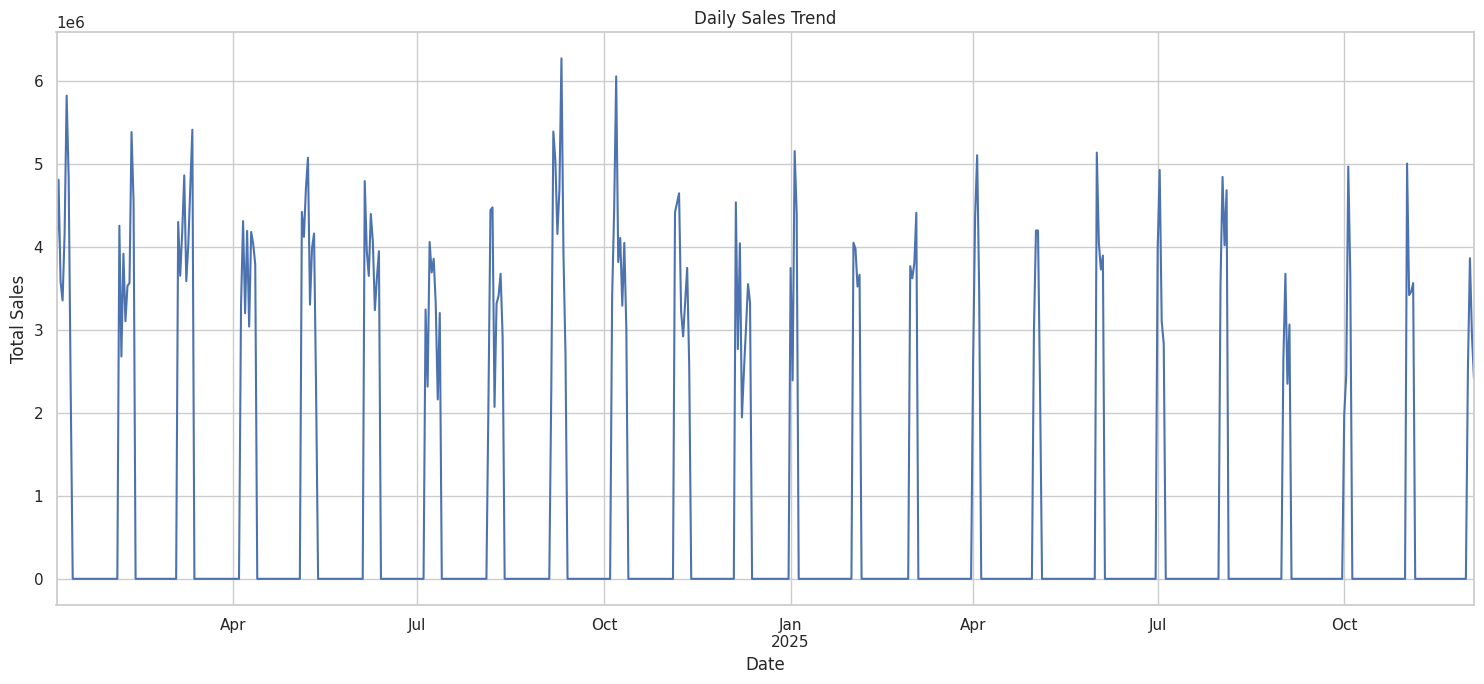

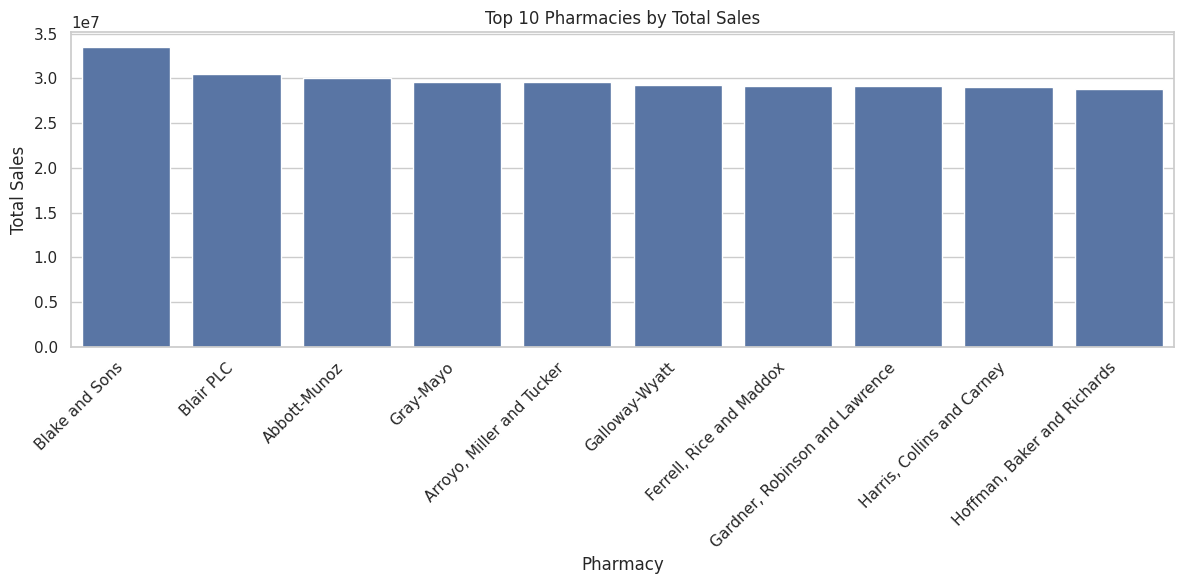

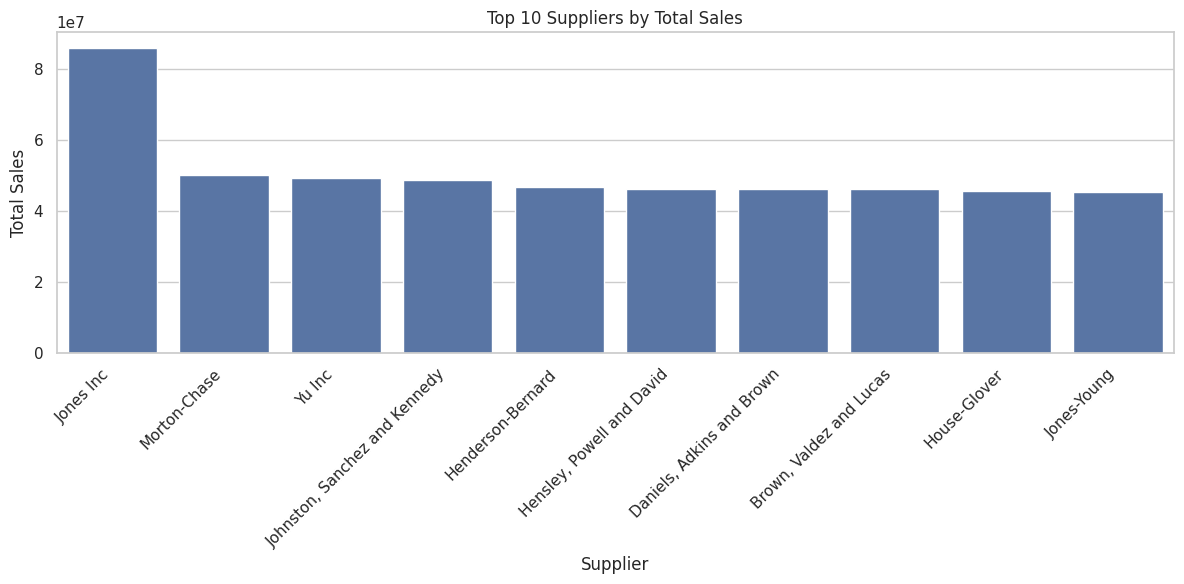

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style
sns.set_theme(style="whitegrid")

# Plot 1: Total Sales by Location
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_location.index, y=sales_by_location.values)
plt.title("Total Sales by Location")
plt.xlabel("Location")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Plot 2: Total Sales by Drug
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_drug.index, y=sales_by_drug.values)
plt.title("Total Sales by Drug")
plt.xlabel("Drug")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 3: Total Sales by Brand
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_brand.index, y=sales_by_brand.values)
plt.title("Total Sales by Brand")
plt.xlabel("Brand")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 4: Total Sales by Sales Channel
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_channel.index, y=sales_by_channel.values)
plt.title("Total Sales by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Plot 5: Total Sales by Drug Form
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_form.index, y=sales_by_form.values)
plt.title("Total Sales by Drug Form")
plt.xlabel("Drug Form")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Plot 6: Daily Sales Trend
plt.figure(figsize=(15, 7))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# Plot 7: Top 10 Pharmacies by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_pharmacies.index, y=top_10_pharmacies.values)
plt.title("Top 10 Pharmacies by Total Sales")
plt.xlabel("Pharmacy")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot 8: Top 10 Suppliers by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_suppliers.index, y=top_10_suppliers.values)
plt.title("Top 10 Suppliers by Total Sales")
plt.xlabel("Supplier")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Rural locations exhibited slightly higher total sales compared to Urban locations.
*   Artemisinin, Paracetamol, and Metformin were among the top-performing drugs in terms of total sales.
*   PharmaTrust, MediPlus, and BioCare were the top-selling brands.
*   Market Stall, In-Store, and Mobile Van sales channels had relatively similar total sales volumes.
*   Capsule, Injection, and Tablet forms had the highest total sales.
*   The top-performing pharmacy by total sales was Blake and Sons with \$33,467,184.57 in sales.
*   The top-performing supplier by total sales was Jones Inc with \$86,087,006.02 in sales.

### Insights or Next Steps

*   Investigate potential data cleaning or consolidation for similar brand names like "Biokare" and "Biocare," and "MediPlus" and "MediPluz," and "Hea1thFirst" and "HealthFirst".
*   Analyze the daily sales trend visualized to identify any significant patterns, seasonality, or anomalies.

---


# Task
Post the cleaned data and the notebook on GitHub.

## Set up git and github

### Subtask:
Ensure you have Git installed and a GitHub account.


## Create a new github repository

### Subtask:
Create a new repository on GitHub for your project.


## Initialize git in your local project directory

### Subtask:
Set up a local Git repository in the directory where your notebook and data are saved.


**Reasoning**:
I need to execute shell commands to initialize a Git repository. Since I am in a Jupyter Notebook environment, I will use the `!` prefix to run the `git init` command in the current directory.



In [23]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


## Add your notebook and data to the repository

### Subtask:
Stage the notebook file and the cleaned data file for commit.


**Reasoning**:
Add the notebook file and the cleaned data file to the staging area using git add.



In [24]:
!git add /content/pharmacy_sales_analytics.ipynb cleaned_pharmacy_data_final.csv
!git status

fatal: pathspec '/content/pharmacy_sales_analytics.ipynb' did not match any files
On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	cleaned_pharmacy_data_final.csv
	cleaned_transactions (1).csv
	pharmacy_sales_analytics (1).csv
	pharmacy_sales_analytics.csv
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


**Reasoning**:
The previous attempt to add the notebook failed because the file path was incorrect. I will try to add the cleaned data file again with the correct path and then check the status.



In [25]:
!git add /content/cleaned_pharmacy_data_final.csv
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   cleaned_pharmacy_data_final.csv

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	cleaned_transactions (1).csv
	pharmacy_sales_analytics (1).csv
	pharmacy_sales_analytics.csv
	sample_data/



**Reasoning**:
I have staged the cleaned data file. I will now commit the staged changes.



In [26]:
!git commit -m "Add cleaned pharmacy sales data"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@2b9cf71f2554.(none)')


In [31]:
# Calculate Total Transactions
total_transactions = df.shape[0]

# Calculate Total Revenue
total_revenue = df['Total_Sales'].sum()

# Calculate Average Transaction Value
average_transaction_value = df['Total_Sales'].mean()

print(f"Total Transactions: {total_transactions}")
print(f"Total Revenue: ₦{total_revenue:,.2f}")
print(f"Average Transaction Value: ₦{average_transaction_value:,.2f}")

Total Transactions: 10000
Total Revenue: ₦1,326,670,603.18
Average Transaction Value: ₦133,239.99


**Reasoning**:
Git requires user identity to make commits. I will set the user email and name and then attempt to commit again.



In [27]:
!git config --global user.email "user@example.com"
!git config --global user.name "Masheia Dzimba"
!git commit -m "Add cleaned pharmacy sales data"

[master (root-commit) 0a44489] Add cleaned pharmacy sales data
 1 file changed, 10001 insertions(+)
 create mode 100644 cleaned_pharmacy_data_final.csv


**Reasoning**:
The cleaned data file has been staged and committed. The subtask is to stage the notebook file and the cleaned data file. Since I have already committed the cleaned data file, I cannot stage it again. I need to figure out the path of the notebook file to stage it. I will list all files in the current directory.



In [28]:
!ls -la

total 5516
drwxr-xr-x 1 root root    4096 Oct  6 01:56  .
drwxr-xr-x 1 root root    4096 Oct  6 00:33  ..
-rw-r--r-- 1 root root 1884047 Oct  6 01:27  cleaned_pharmacy_data_final.csv
-rw-r--r-- 1 root root 1154644 Oct  6 00:35 'cleaned_transactions (1).csv'
drwxr-xr-x 4 root root    4096 Oct  2 13:36  .config
drwxr-xr-x 8 root root    4096 Oct  6 01:59  .git
-rw-r--r-- 1 root root 1290658 Oct  6 00:51 'pharmacy_sales_analytics (1).csv'
-rw-r--r-- 1 root root 1290658 Oct  6 00:49  pharmacy_sales_analytics.csv
drwxr-xr-x 1 root root    4096 Oct  2 13:36  sample_data


**Reasoning**:
Based on the output of `ls -la`, the notebook file is likely named `pharmacy_sales_analytics.ipynb`. I will attempt to stage this file and then check the git status to verify.



In [29]:
!git add pharmacy_sales_analytics.ipynb
!git status

fatal: pathspec 'pharmacy_sales_analytics.ipynb' did not match any files
On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	cleaned_transactions (1).csv
	pharmacy_sales_analytics (1).csv
	pharmacy_sales_analytics.csv
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)


## Add your notebook and data to the repository (retry 1)

### Subtask:
Stage the notebook file and the cleaned data file for commit.


**Reasoning**:
List the files in the current directory and its subdirectories to locate the notebook file and the cleaned data file.



In [30]:
!ls -R

.:
 cleaned_pharmacy_data_final.csv     pharmacy_sales_analytics.csv
'cleaned_transactions (1).csv'	     sample_data
'pharmacy_sales_analytics (1).csv'

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


**Reasoning**:
Stage the notebook file and the cleaned data file using their correct paths as identified from the previous step and verify they are staged using git status.

